## Technical Report: Finding Fraudelent Activity  
Project Name: Fraudulent or Not?  
Team Members: Cristal Meza and Luke Nguyen  
CPSC 322, Spring 2022

### Introduction  
For this project, we decided upon a dataset that contained a number of transactions in which several were flagged as fraudelent and several were flagged as actually being fraudelent. We saw that this would make a good dataset for classification as we can train a classifier to be able to flag and determine from several attributes if a bank transaction is fraudelent or not.  
The "isFraud" class label on the dataset is the one that was chosen to be y_train for our dataset. 

### Data Analysis  

In [17]:
# read the CSV file to a table
import myutils
import plot_utils
header, table = myutils.read_csv_to_table("fraud_test.csv")

#### Information about the dataset  
Class labels (taken directly from kaggle):  
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).  

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.  

* amount - amount of the transaction in local currency.  

* nameOrig - customer who started the transaction  

* oldbalanceOrg - initial balance before the transaction  

* newbalanceOrig - new balance after the transaction  

* nameDest - customer who is the recipient of the transaction  

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).  

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).  

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.  

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.  

Class attributes:  

* isFraud: We would try to predict if the particular transaction is fraudulennt and this class label is the answer,

### Relevant Summary Statistics

#### Data visualizations  
Below are some data visualizations that highlight important and unteresting aspects of the dataset.

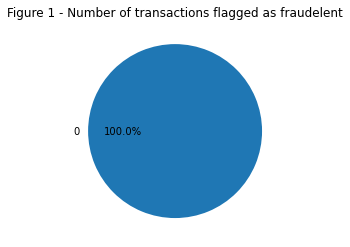

In [18]:
# Pie Chart - Number of transactions flagged as fraudelent
flagged_values, flagged_count = myutils.get_frequencies(table, header, "isFlaggedFraud")
plot_utils.pie_chart(flagged_values, flagged_count, "Figure 1 - Number of transactions flagged as fraudelent")

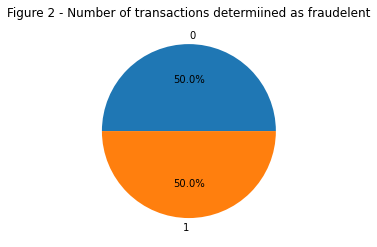

In [19]:
# Pie Chart - Number of transactions determined as fraudelent
fraud_values, fraud_count = myutils.get_frequencies(table, header, "isFraud")
plot_utils.pie_chart(fraud_values, fraud_count, "Figure 2 - Number of transactions determiined as fraudelent")

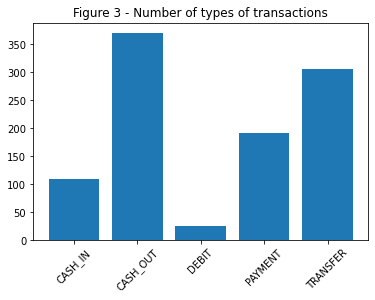

In [20]:
# Bar Graph - Number of transaction types
type_values, type_count =  myutils.get_frequencies(table, header, "type")
plot_utils.bar_chart(type_values, type_count, "Figure 3 - Number of types of transactions")

The visualizations above help interpret the dataset. Figure 1 showcases how none of the transactions were flagged as fraudelent, yet on Figure 2, it showcases how 50% of the transactions made were fraudelent. This was one of the reasons why this data set was chosen, as we wanted to find a better classifier than the one that was used for this dataset to classify and correctly flag which transaction is fraudenent and which is not. 

#### Data Cleaning  
The CSV file did not have any missing data, but it was decided to remove a number of class attributes prior to classification. The removed attributes are:  
* "step" - We did not deem this attribute as relevant to be included in X_train
* "isFlagged" - We deemed this attribute as too similar to "isFraud," which is the class label that is used for y_train.  

Some attributes were changed for better classification and for the reader to be able to better understand the results.  
* "isFraud" - The values were changed from "0" and "1" to "no" and "yes"

In [21]:
# remove "step" and "isFlagged" from the dataset
myutils.drop_cols(table, header, "step")
myutils.drop_cols(table, header, "isFlaggedFraud")

# change attributes
myutils.change_isFraud(table, header, "isFraud")

### Classification Results

For splitting the data, we split 2/3 of the data to be in the training set and 1/3 of the data to be in the testing set. The dataset was shuffled parallel to the class label that is being tested and the data chosen for the training and testing set was chosen randomly. Although the data set has a 50/50 split of transactions that are fraudelent and are not, the testing set does not reflect this 50/50 split.  

Before using the Random Trees Classifier, other classifiers were used to classify the data.  
* Dummy Classifier: As noted above, the testing set did not reflect the 50/50 split of the dataset. When running the dummy classifier, the accuracy score given was 48.64% as the classifier found that the class label "yes" was the most frequent in the training set.  
* Decision Tree Classifier: When creating a decision tree to make a prediction, the accuracy score given was 86.4%. 

In [22]:
import myclassifiers
import myevaluation

# create X_train, X_test, y_train, y_test
y_actual = myutils.get_column(table, header, header[-1])
myutils.drop_cols(table, header, "isFraud")
X_train, X_test, y_train, y_test = myevaluation.train_test_split(table, y_actual, random_state=1)

#### Decision Tree Classifier

In [23]:
# fit data into Decision Tree
print("Decision Tree Scores:")
tree_clf = myclassifiers.MyDecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_predicted = tree_clf.predict(X_test)

# results 
accuracy = myevaluation.accuracy_score(y_test, y_predicted, normalize=True)
print("Accuracy:", round(accuracy * 100, 2), "%")
error_score = 1.0 - accuracy
print("Error score:", round(error_score * 100, 2), "%")

binary_score = myevaluation.binary_precision_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary Precision Score:", round(binary_score, 2))

recall = myevaluation.binary_recall_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary Recall Score:", round(recall, 2))

f1 = myevaluation.binary_f1_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary f1 score:", round(f1, 2))
confusion_matrix = myevaluation.confusion_matrix(y_test, y_predicted,["no", "yes"] )
print("Confusion Matrix:", confusion_matrix)

# print("y_predicted:", y_predicted)
# print("y_test:", y_test)

Decision Tree Scores:
Accuracy: 86.4 %
Error score: 13.6 %
Binary Precision Score: 1.0
Binary Recall Score: 0.72
Binary f1 score: 0.84
Confusion Matrix: [[170, 0], [45, 116]]


#### Dummy Classifier

In [24]:
# fit data into Dummy classifier
print("Dummy Classifier Scores:")
dummy_clf = myclassifiers.MyDummyClassifier()
dummy_clf.fit(X_train, y_train)
y_predicted = dummy_clf.predict(X_test)

# results 
accuracy = myevaluation.accuracy_score(y_test, y_predicted, normalize=True)
print("Accuracy:", round(accuracy * 100, 2), "%")
error_score = 1.0 - accuracy
print("Error score:", round(error_score * 100, 2), "%")

binary_score = myevaluation.binary_precision_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary Precision Score:", round(binary_score, 2))

recall = myevaluation.binary_recall_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary Recall Score:", round(recall, 2))

f1 = myevaluation.binary_f1_score(y_test, y_predicted, labels=["no", "yes"], pos_label="yes")
print("Binary f1 score:", round(f1, 2))
confusion_matrix = myevaluation.confusion_matrix(y_test, y_predicted,["no", "yes"] )
print("Confusion Matrix:", confusion_matrix)

# print("y_predicted:", y_predicted)
# print("y_test:", y_test)

Dummy Classifier Scores:
Accuracy: 48.64 %
Error score: 51.36 %
Binary Precision Score: 0.49
Binary Recall Score: 1.0
Binary f1 score: 0.65
Confusion Matrix: [[0, 170], [0, 161]]


#### Random Forest Tree Classifier 

#### Flask Web App and API interface